# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     787.6
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.58e-39
Time:                        11:20:13   Log-Likelihood:                -2.4129
No. Observations:                  50   AIC:                             12.83
Df Residuals:                      46   BIC:                             20.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0481      0.090     55.944      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.52007686  4.9942052   5.43083955  5.80452762  6.09900273  6.30985637
  6.44526248  6.52463454  6.57543593  6.62866786  6.71377585  6.85381203
  7.06164764  7.33785838  7.67062983  8.03769846  8.41000956  8.75649075
  9.04915717  9.26770924  9.40286789  9.45789903  9.448077    9.39817503
  9.33839507  9.29940569  9.30730335  9.37932477  9.52101503  9.72531653
  9.9737285  10.23934665 10.49128346 10.69974293 10.84091595 10.90089208
 10.87794501 10.78281617 10.63694994 10.46897044 10.3099786  10.18844243
 10.12551977 10.13158211 10.20451063 10.33004426 10.48412276 10.63683978
 10.75735631 10.81896752]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.78845219 10.63339494 10.37211059 10.04633632  9.71101295  9.4208335
  9.21685243  9.11643411  9.10900134  9.15862513]


## Plot comparison

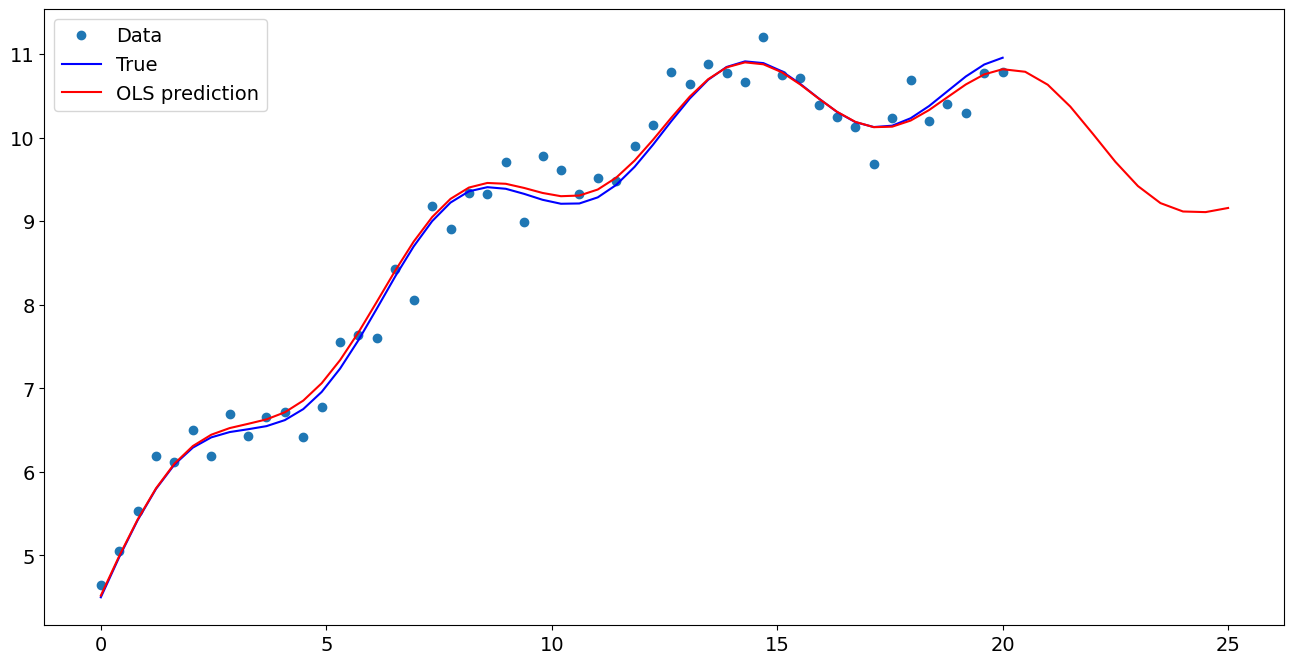

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.048136
x1                  0.504850
np.sin(x1)          0.467022
I((x1 - 5) ** 2)   -0.021122
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.788452
1    10.633395
2    10.372111
3    10.046336
4     9.711013
5     9.420833
6     9.216852
7     9.116434
8     9.109001
9     9.158625
dtype: float64